<a href="https://colab.research.google.com/github/WanQi-K/DataSciencePortfolio/blob/main/Kaggle_California_House_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
sns.set()

!pip install scikit-learn==1.3.0
!pip install xgboost

from google.colab import drive

drive.mount('/content/drive')
pd.options.display.float_format = '{:.2f}'.format
%matplotlib inline

Mounted at /content/drive


In [2]:
path=r'/content/drive/MyDrive/Data Science Data Repository/Kaggle - California House Price Prediction/'

data = pd.read_csv(path+"housing.csv")

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.00,880.00,129.00,322.00,126.00,8.33,452600.00,NEAR BAY
1,-122.22,37.86,21.00,7099.00,1106.00,2401.00,1138.00,8.30,358500.00,NEAR BAY
2,-122.24,37.85,52.00,1467.00,190.00,496.00,177.00,7.26,352100.00,NEAR BAY
3,-122.25,37.85,52.00,1274.00,235.00,558.00,219.00,5.64,341300.00,NEAR BAY
4,-122.25,37.85,52.00,1627.00,280.00,565.00,259.00,3.85,342200.00,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.00,1665.00,374.00,845.00,330.00,1.56,78100.00,INLAND
20636,-121.21,39.49,18.00,697.00,150.00,356.00,114.00,2.56,77100.00,INLAND
20637,-121.22,39.43,17.00,2254.00,485.00,1007.00,433.00,1.70,92300.00,INLAND
20638,-121.32,39.43,18.00,1860.00,409.00,741.00,349.00,1.87,84700.00,INLAND


#Data Exploration

In [4]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.00,20640.00,20640.00,20640.00,20433.00,20640.00,20640.00,20640.00,20640.00
mean,-119.57,35.63,28.64,2635.76,537.87,1425.48,499.54,3.87,206855.82
std,2.00,2.14,12.59,2181.62,421.39,1132.46,382.33,1.90,115395.62
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00
25%,-121.80,33.93,18.00,1447.75,296.00,787.00,280.00,2.56,119600.00
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.53,179700.00
75%,-118.01,37.71,37.00,3148.00,647.00,1725.00,605.00,4.74,264725.00
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00


In [5]:
data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

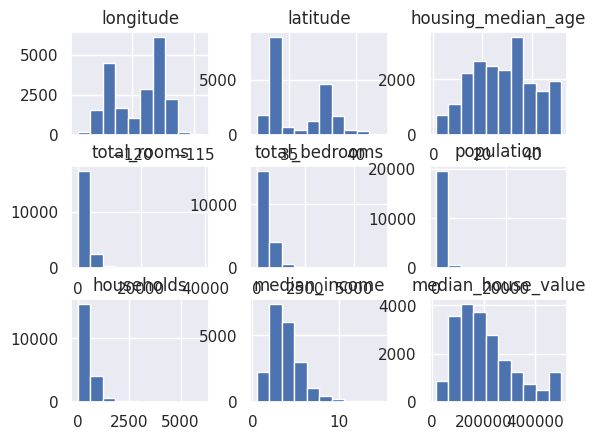

In [8]:
figsize=(20,10)
data.hist()

In [ ]:
#Log the selected features
data['total_rooms']=np.log(data['total_rooms']+1)
data['total_bedrooms']=np.log(data['total_bedrooms']+1)
data['population']=np.log(data['population']+1)
data['households']=np.log(data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

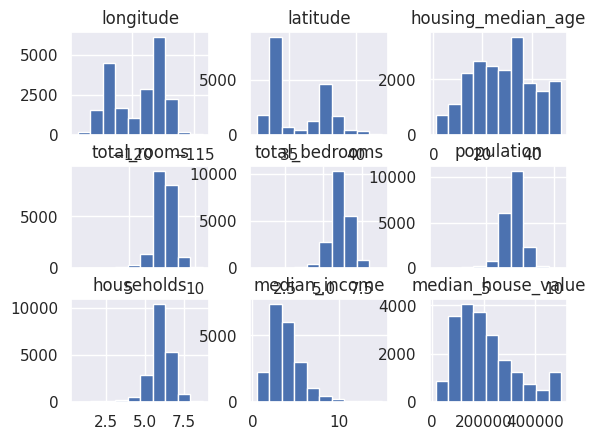

In [ ]:
figsize=(15,8)
data.hist()

# Feature Engineering

In [ ]:
# Create dummies for all values in ocean_proximity
data.ocean_proximity.value_counts()

,count
ocean_proximity,
<1H OCEAN,9034
INLAND,6496
NEAR OCEAN,2628
NEAR BAY,2270
ISLAND,5


In [ ]:
data = data.join(pd.get_dummies(data.ocean_proximity, dtype=int)).drop('ocean_proximity', axis=1)

In [ ]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.00,6.78,4.87,5.78,4.84,8.33,452600.00,0,0,0,1,0
1,-122.22,37.86,21.00,8.87,7.01,7.78,7.04,8.30,358500.00,0,0,0,1,0
2,-122.24,37.85,52.00,7.29,5.25,6.21,5.18,7.26,352100.00,0,0,0,1,0
3,-122.25,37.85,52.00,7.15,5.46,6.33,5.39,5.64,341300.00,0,0,0,1,0
4,-122.25,37.85,52.00,7.40,5.64,6.34,5.56,3.85,342200.00,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.00,7.42,5.93,6.74,5.80,1.56,78100.00,0,1,0,0,0
20636,-121.21,39.49,18.00,6.55,5.02,5.88,4.74,2.56,77100.00,0,1,0,0,0
20637,-121.22,39.43,17.00,7.72,6.19,6.92,6.07,1.70,92300.00,0,1,0,0,0
20638,-121.32,39.43,18.00,7.53,6.02,6.61,5.86,1.87,84700.00,0,1,0,0,0


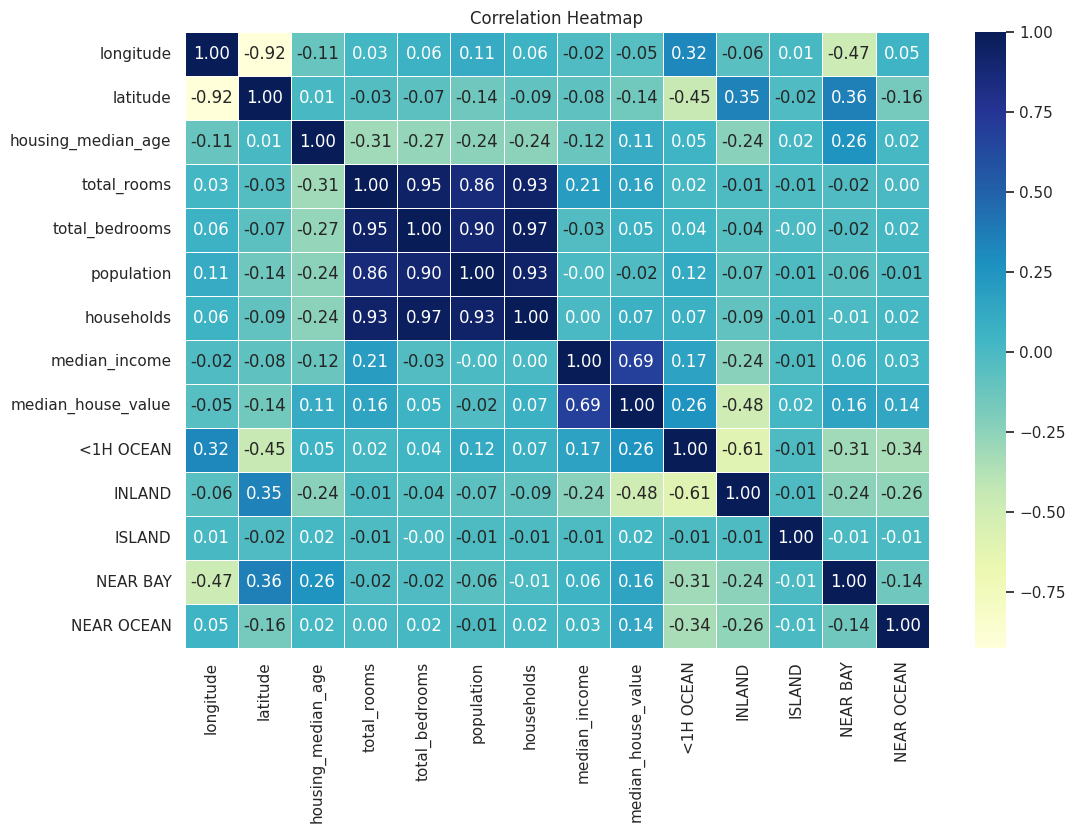

In [ ]:
data_corr=data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(data_corr, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

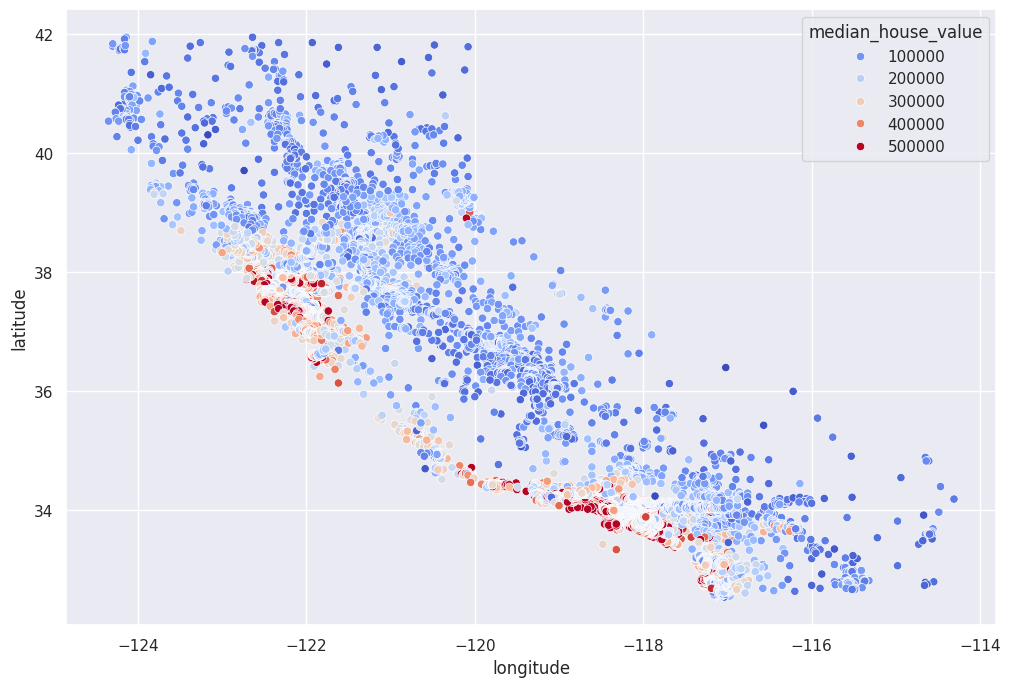

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='longitude', y='latitude', hue='median_house_value',palette='coolwarm')
plt.show()

#Can observe the nearer to the coast, the higher the price

In [ ]:
# Combine Features
data['bedroom_ratio']=data['total_bedrooms']/data['total_rooms']
data['household_rooms']=data['total_rooms']/data['households']

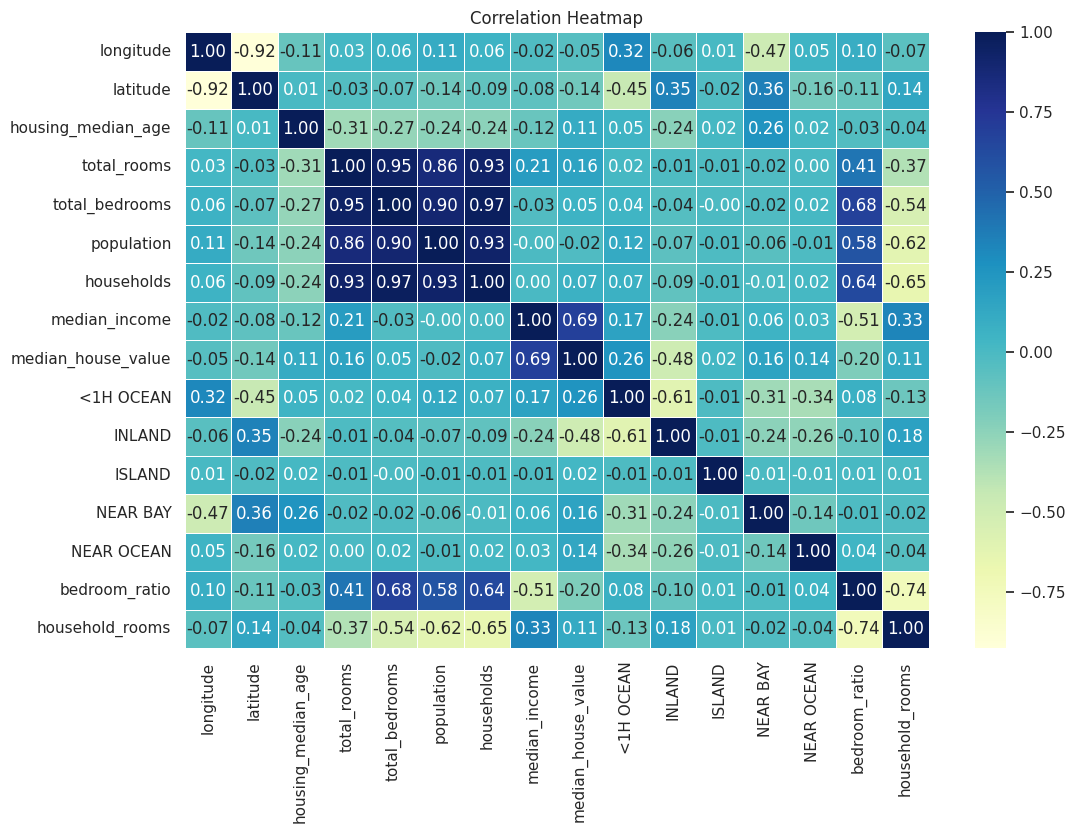

In [ ]:
data_corr=data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(data_corr, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY',
       'NEAR OCEAN', 'bedroom_ratio', 'household_rooms'],
      dtype='object')

# Data Modelling

In [ ]:
# Make sure the data is split equally for the selected Features
data.reset_index(drop=True, inplace=True)
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indices, test_indices in split.split(data, data[['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY','NEAR OCEAN']]):
    strat_train_set = data.loc[train_indices]
    strat_test_set = data.loc[test_indices]

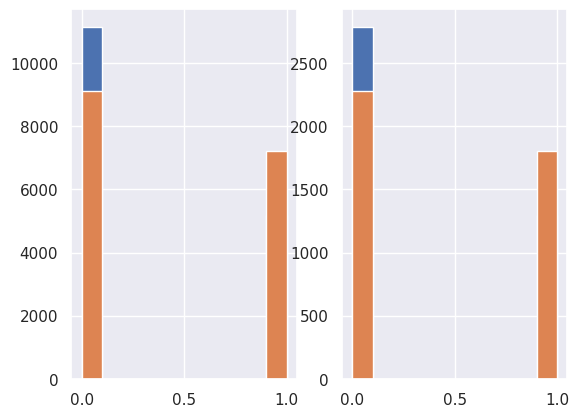

In [ ]:
plt.subplot(1,2,1)
strat_train_set['INLAND'].hist()
strat_train_set['<1H OCEAN'].hist()

plt.subplot(1,2,2)
strat_test_set['INLAND'].hist()
strat_test_set['<1H OCEAN'].hist()

plt.show()

# Main objective is to ensure the the data set is split the same for both train and test
# Test data is split just to ensure the train data we have is similar with the test data

In [ ]:
from sklearn.preprocessing import StandardScaler

# Features to be scaled
numerical_features = ['longitude', 'latitude', 'housing_median_age',
                      'median_income', 'bedroom_ratio', 'household_rooms',
                      '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY','NEAR OCEAN']

# Create scaler object
scaler = StandardScaler()

# Fit and transform the selected features in the training data
strat_train_set[numerical_features] = scaler.fit_transform(strat_train_set[numerical_features])

# Transform the selected features in the testing data
strat_test_set[numerical_features] = scaler.transform(strat_test_set[numerical_features])

In [ ]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
19094,-1.57,1.31,-0.21,8.19,6.60,7.87,6.56,-0.41,143800.00,1.12,-0.68,-0.02,-0.35,-0.38,0.38,-0.41
20029,0.15,-0.65,-0.45,8.18,6.63,7.28,6.48,0.16,359100.00,-0.89,-0.68,-0.02,-0.35,2.60,0.48,-0.22
11339,0.78,-0.92,-1.01,8.18,6.66,7.41,6.65,0.60,397600.00,-0.89,-0.68,-0.02,-0.35,2.60,0.59,-0.64
1805,-1.37,1.08,0.82,7.83,5.92,6.77,5.85,0.76,286500.00,-0.89,-0.68,-0.02,2.83,-0.38,-0.96,0.72
8835,0.55,-0.77,0.98,7.86,6.61,6.97,6.51,-0.35,370000.00,1.12,-0.68,-0.02,-0.35,-0.38,1.34,-0.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12919,-0.78,1.42,-2.12,9.42,7.47,8.40,7.29,1.24,222500.00,-0.89,1.46,-0.02,-0.35,-0.38,0.01,0.13
12883,-0.85,1.42,-1.08,7.44,5.85,6.58,5.87,0.00,128700.00,-0.89,1.46,-0.02,-0.35,-0.38,-0.15,-0.16
7087,0.70,-0.74,0.58,6.77,5.31,7.96,5.20,-0.89,123800.00,1.12,-0.68,-0.02,-0.35,-0.38,-0.21,0.25
14903,1.31,-1.35,-0.29,8.10,6.05,7.09,6.03,1.27,303400.00,1.12,-0.68,-0.02,-0.35,-0.38,-1.24,0.80


In [ ]:
from sklearn.linear_model import LinearRegression

# Dependent Variable
train_targets = strat_train_set['median_house_value']

# Independent Variables
train_inputs = strat_train_set.drop(['median_house_value'], axis=1)

# Create and fit the model
reg = LinearRegression()
reg.fit(train_inputs, train_targets)

LinearRegression()

In [ ]:
# Repeat the same for strattestdata

# Dependent Variable
test_targets = strat_test_set['median_house_value']

# Independent Variables
test_inputs = strat_test_set.drop(['median_house_value'], axis=1)

# Create and fit the model
reg = LinearRegression()
reg.fit(test_inputs, test_targets)

# Make predictions on the test set
y_hat_test = reg.predict(strat_test_set.drop(['median_house_value'], axis=1))

In [ ]:
reg.score(test_inputs, test_targets)
# Accuracy only at 67%, quite low, so we will explore other ML model

0.6777915757482045

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor(random_state=42)
forest.fit(train_inputs, train_targets)

RandomForestRegressor(random_state=42)

In [ ]:
forest.score(test_inputs,test_targets)
# Better than Linear Regression without hyperparameter tuning

0.8128357467768593

In [ ]:
#10 minutes
#Hyperparameter tuning
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor(random_state=42)

param_grid = [
    {"n_estimators": [100,200],
     'min_samples_split':[4,6],
     'max_depth':[None,4]
    }
]

# Corrected the order of arguments to grid_search.fit() and change scoring to "r2"
grid_search = GridSearchCV(forest, param_grid, cv=3, scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(train_inputs, train_targets)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_depth': [None, 4], 'min_samples_split': [4, 6],
                          'n_estimators': [100, 200]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
best_forest=grid_search.best_estimator_
best_forest

RandomForestRegressor(min_samples_split=4, n_estimators=200, random_state=42)

In [ ]:
best_forest.score(test_inputs,test_targets)
# Not much difference even after hyperparameter tuning

0.8123817795602741

In [ ]:
#2 minutes
import xgboost as xgb

# Convert column names to strings if necessary
train_inputs.columns = train_inputs.columns.astype(str)

# Replace invalid characters in column names
train_inputs.columns = train_inputs.columns.str.replace(r'[\[\]\<]', '', regex=True)

# Create an XGBoost regressor object
xgb_model = xgb.XGBRegressor(random_state=42)

# Define the parameter grid for tuning
param_grid_xgb = {
       'n_estimators': [100, 200],
       'learning_rate': [0.01, 0.1],
       'max_depth': [3, 5],
       'subsample': [0.8, 1.0],
       'colsample_bytree': [0.8, 1.0]
   }

# Create GridSearchCV object
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=3,scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_xgb.fit(train_inputs, train_targets)

best_xgb_model = grid_search_xgb.best_estimator_

In [ ]:
test_inputs.columns = test_inputs.columns.str.replace(r'[\[\]\<]', '', regex=True)
test_inputs.columns = test_inputs.columns.astype(str)

best_xgb_model.score(test_inputs,test_targets)
#Slightly better than RandomForest

0.8273374112277905

In [ ]:
#20 minutes

from sklearn.svm import SVR

# Create an SVM regressor object
svm_model = SVR()

   # Define the parameter grid for tuning (example)
param_grid_svm = {
       'kernel': ['linear'],
       'C': [10,30,50],
       'epsilon': [ 0.5,0.7,0.9]
}

   # Create GridSearchCV object
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5,
                                 scoring='neg_mean_squared_error', n_jobs=-1)

   # Fit the model
grid_search_svm.fit(train_inputs, train_targets)

   # Get the best estimator
best_svm_model = grid_search_svm.best_estimator_

In [ ]:
best_svm_model.score(test_inputs,test_targets)
# Worst model among all

0.5135395231513289

In [ ]:
best_svm_model

SVR(C=10, epsilon=0.5, kernel='linear')